<h1 align='center'> Time Series Forecasting General Methods </h1>

We are done with analyze the data at the hand and getting graphical and numerical insights from the data. We can use the statistics of the existing data to forecast in future. 

## **Contents**

- **Forecasting with Holt-Winters method**
- **Time Series Stationarity and Differencing**
- **Descriptive statistics and tests**
- **ARMA**
- **ARIMA**
- **SARIMA**
- **SARIMAX**
- **VAR**
- **VARMA**


## Forecasting with Holt-Winter method

This method is another name of Triple Exponential Smoothing. It takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

I am using same Sales Data of Furnitures. The main objective here is to divide the dataset into 2 parts namely train and test section and then evaluate the performance of the model.


### Imports

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline


### Load the Data

In [3]:
#plot the sales data of furniture
df = pd.read_excel('data/Superstore_Sales_Records.xls', index_col='Order Date', parse_dates=True)
df = df[df['Category']=='Furniture']
df = df.groupby(by='Order Date').agg({'Sales':sum})
df.sort_index(inplace=True)
df.head(4)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940


Change the resample frequency and make it monthly sales instead of daily.


In [4]:
#resample the data on Monthly level
df = df.resample('MS').sum()

df.head(4)

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837


### Train/Test split

Divide the data into `80:20` to train to test ratio.

In [6]:
df.shape

(48, 1)

In [5]:
#total length
n = len(df)
#train size
m = int(n*0.8)

train_data = df.iloc[0:m]
test_data = df.iloc[m:n]

print(f"Total df size {len(df)}")
print(f"Total train data size {len(train_data)}")
print(f"Total test data size {len(test_data)}")

Total df size 48
Total train data size 38
Total test data size 10


In [11]:
train_data.tail()

,Sales
Order Date,
2016-10-01,11872.5770
2016-11-01,31783.6288
2016-12-01,36678.7150
2017-01-01,5964.0320
2017-02-01,6866.3374


### Fitting the model


In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Sales'], trend='mul', seasonal='mul', seasonal_periods=12).fit()


/Users/ajitkumarsingh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Evaluating against test set


In [46]:
test_predictions = fitted_model.forecast(len(test_data))

In [47]:
test_predictions

2017-03-01    13763.527009
2017-04-01    12828.424876
2017-05-01    13100.634157
2017-06-01    10880.026770
2017-07-01    14485.001836
2017-08-01    10032.360087
2017-09-01    29777.813730
2017-10-01    14468.440315
2017-11-01    30588.479516
2017-12-01    31461.293604
Freq: MS, dtype: float64

### Plot test and train data

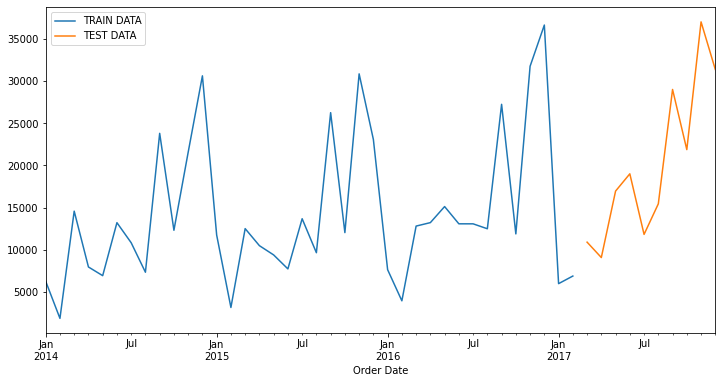

In [48]:
train_data['Sales'].plot(legend=True, label='TRAIN DATA')
test_data['Sales'].plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)

### Plot Actual vs Predicted values

<Axes: xlabel='Order Date'>

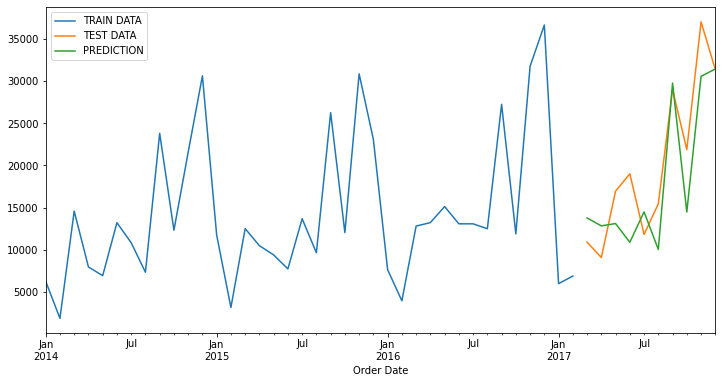

In [49]:
train_data['Sales'].plot(legend=True, label='TRAIN DATA')
test_data['Sales'].plot(legend=True, label='TEST DATA', figsize=(12, 6)).autoscale(axis='x', tight=True)
test_predictions.plot(legend=True, label='PREDICTION')

### Evalution Metrics

Since this is a type of regression problem we can use regression metrics like *Mean Squared Error(MSE)* or *Root Mean Squared Error(RMSE)* or *Mean Absolute Error(MAE)*

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
mae_error = mean_absolute_error(test_data, test_predictions)

print(f"Mean absolute error of the above model is {mae_error}")

Mean absolute error of the above model is 4138.682460955162


In [53]:
mse_error = mean_squared_error(test_data, test_predictions)

print(f"Mean squared error of the above model is {mse_error}")

Mean squared error of the above model is 23713961.102707732


In [54]:
rmse_error = np.sqrt(mean_squared_error(test_data, test_predictions))

print(f"Root mean squared error of the above model is {rmse_error}")

Root mean squared error of the above model is 4869.698255817062


In [55]:
test_data.describe()

,Sales
count,10.000000
mean,20255.689980
std,9463.329001
min,9065.958100
25%,12720.235000
50%,17983.072450
75%,27242.171550
max,37056.715000


### Forecast in future

We evaluated the model by training on train data and testing it on the unknown points to the model. In this section we will see how model's forecast looks on future points which is not even in our test set.

We will train the model on whole dataset and then will try to predict on furure points.

In [56]:
fitted_model = ExponentialSmoothing(df['Sales'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/Users/ajitkumarsingh/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [57]:
future_preds = fitted_model.forecast(12)

In [58]:
future_preds

2018-01-01    10145.196758
2018-02-01     5276.646045
2018-03-01    14046.143518
2018-04-01    12638.938600
2018-05-01    15347.806822
2018-06-01    14398.498944
2018-07-01    15575.177149
2018-08-01    12050.471323
2018-09-01    32198.645769
2018-10-01    15228.732215
2018-11-01    34823.955051
2018-12-01    37118.533234
Freq: MS, dtype: float64

<Axes: xlabel='Order Date'>

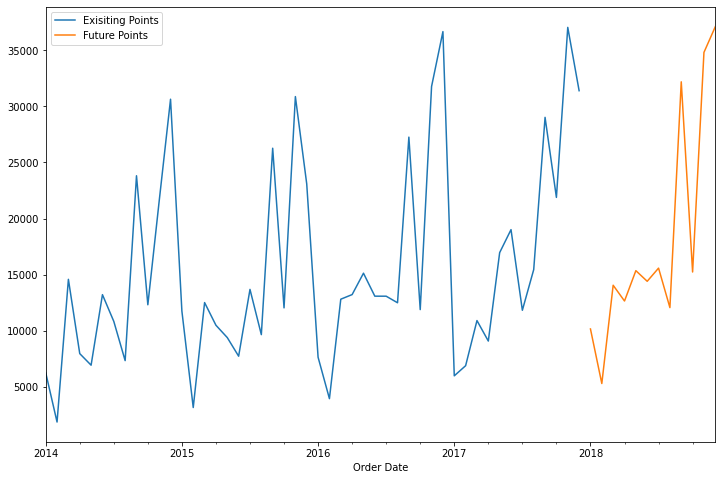

In [59]:
df['Sales'].plot(figsize=(12, 8), legend=True, label='Exisiting Points')
future_preds.plot(figsize=(12, 8), legend=True, label='Future Points')

## Time Series Stationarity and Differencing

### Stationarity

Time series said to be stationary if it does not exhibit trends or seasonality i.e fluctuations in the data are entirely due to outside factors and noises

Example:

`Samples.csv` file contains some dummy data and we can use it to illustrate satationarity.

In [4]:
df = pd.read_csv('Data/samples.csv', index_col=0, parse_dates=True)
df.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


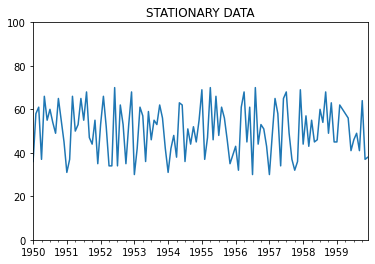

In [6]:
df['a'].plot(ylim=[0, 100], title='STATIONARY DATA').autoscale(axis='x', tight=True)


Check MA of attribute `a`

<Axes: title={'center': 'Moving Average'}>

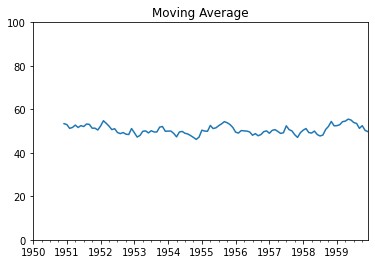

In [10]:
df['a_ma'] = df['a'].rolling(12).mean()

df['a_ma'].plot(ylim=[0, 100], title='Moving Average')

Mean seems have a nearly constant value.

**Non stationary Data**

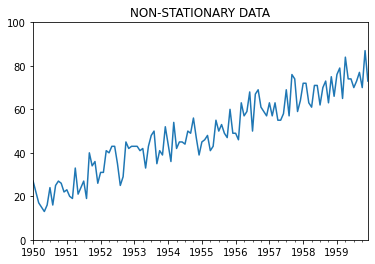

In [11]:
df['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True)

Calculate MA with window size of 12.

<Axes: title={'center': 'Moving Average'}>

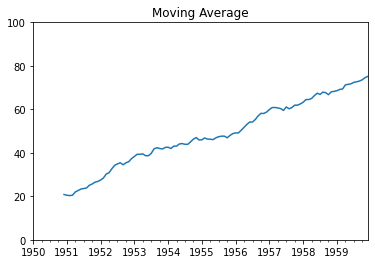

In [12]:
df['b_ma'] = df['b'].rolling(12).mean()
df['b_ma'].plot(ylim=[0, 100], title='Moving Average')

Mean does not seem same between two equidistance timestamp.

### Differencing

Non-stationary data can be made to look stationary through <em>differencing</em>. A simple differencing method calculates the difference between consecutive points.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.tools.diff.html'>statespace.tools.diff</a></strong><font color=green>(series[, k_diff, …])</font>&nbsp;&nbsp;Difference a series simply and/or seasonally along the zero-th axis.</tt></div>

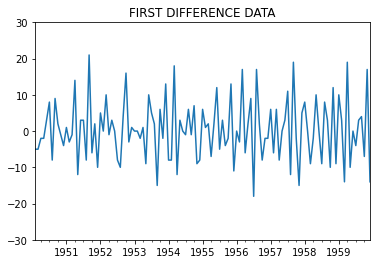

In [22]:
from statsmodels.tsa.statespace.tools import diff

df['d1'] = diff(df['b'],k_diff=1)

df['d1'].plot(title="FIRST DIFFERENCE DATA", ylim=[-30, 30]).autoscale(axis='x',tight=True)

Let's check the MA for this series.

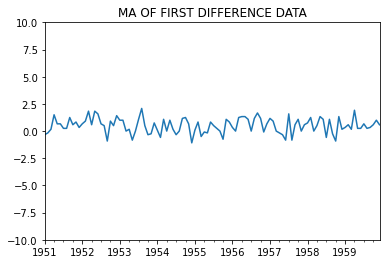

In [19]:
df['d1_ma'] = df['d1'].rolling(12).mean()

df['d1_ma'].plot(title="MA OF FIRST DIFFERENCE DATA", ylim=[-10, 10]).autoscale(axis='x',tight=True)

Clearly differencing stablized the original series and now it seems like a stationary series.

### Lagging

It is also known as `backshifting`, lagging notation reflects the value of `y` at a prior point in time. This is useful technique for performing regression.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}

<br>
<table>
<tr><td>{y_t}</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>


## Autocorrelation function/Partial autocorrelation function
